# Análisis Factorial Exploratorio (AFE)

>Este tutorial es una selección y adaptación al español del libro [Multivariate Data Analysis](https://www.cengage.co.uk/books/9781473756540/) de Joseph F. Hair et al.

> Requiere cargar el archivo ["euthan.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/euthan.sav) en el repositorio local. 


In [ ]:
!pip install pyreadstat
!pip install factor_analyzer
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/euthan.sav

### Supuestos estadísticos

El investigador debe asegurarse de que la matriz de datos tenga correlaciones suficientes para justificar la aplicación del AFE. 

Si se encuentra que todas las correlaciones son bajas, o que todas las correlaciones son iguales (lo que denota que no existe una estructura para agrupar las variables), entonces el investigador debe cuestionar la aplicación del AFE. Para ello, se encuentran disponibles varios enfoques:

#### Inspección visual

Si la inspección visual revela un **pequeño número de variables con correlaciones mayores de .30**, entonces el AFE probablemente sea inapropiado.

Veamos un ejemplo:


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_spss("euthan.sav")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,0.857588,0.785601,0.119556,0.154735,0.686161,0.865330,0.272019,0.041718,0.881063,0.916052,0.039223,0.011506
1,-0.867251,-0.472065,-0.717338,-0.781541,-0.402548,-0.270416,-0.595042,-1.022102,-0.072087,-1.728400,-0.784465,0.011506
2,0.857588,0.785601,-1.554233,0.154735,0.686161,0.865330,0.272019,0.041718,0.881063,0.916052,1.686599,0.833058
3,-0.004831,0.785601,-1.554233,0.154735,0.686161,0.865330,1.139081,1.105538,-1.025236,0.916052,0.039223,0.011506
4,-0.867251,-0.472065,0.956451,-0.781541,-1.491256,-0.270416,0.272019,0.041718,-1.025236,0.034568,0.039223,0.833058
...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.857588,-0.472065,-1.554233,0.154735,0.686161,-0.270416,-0.595042,0.041718,-0.072087,0.916052,0.039223,0.011506
353,0.857588,0.785601,-0.717338,-0.781541,0.686161,0.865330,-0.595042,-1.022102,0.881063,0.916052,-0.784465,-0.810046
354,0.857588,0.785601,-0.717338,1.091011,0.686161,0.865330,1.139081,0.041718,0.881063,0.916052,1.686599,0.833058
355,-0.004831,-0.472065,-0.717338,0.154735,0.686161,-0.270416,0.272019,0.041718,-0.072087,0.034568,0.862911,0.011506


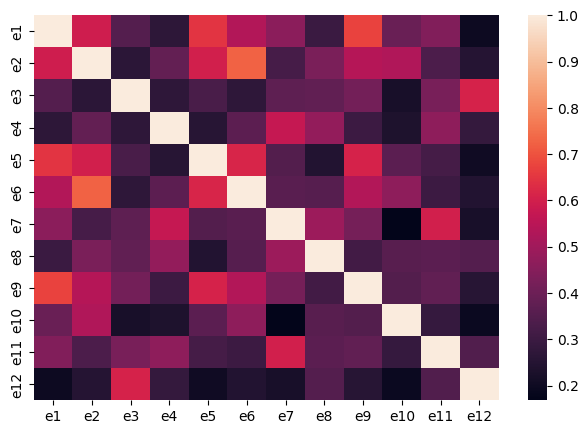

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5, 5))
sns.heatmap(scaled_df.corr())
plt.show()

Veamos las correlaciones parciales en nuestro ejemplo:

/home/renato/.virtualenvs/python/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


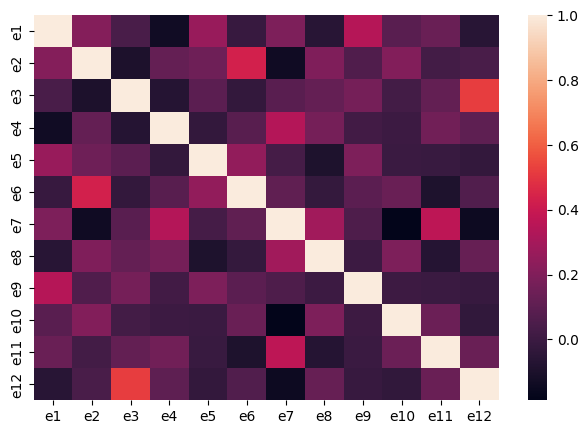

In [3]:
import pingouin as pg

plt.figure(figsize=(7.5, 5))
sns.heatmap(scaled_df.pcorr())
plt.show()

Podemos apreciar que son pocas las variables que presentan correlaciones parciales por encima de 0.7.

#### Prueba de Bartlett

La prueba de esfericidad de Bartlett es una **prueba estadística de la presencia de correlaciones entre las variables**. Proporciona la significancia estadística que indica que la matriz de correlación tiene correlaciones significativas entre al menos algunas de las variables. 

El investigador debe tener en cuenta, sin embargo, que al aumentar el tamaño de la muestra, la prueba de Bartlett se vuelve más sensible para detectar correlaciones entre las variables.

Apliquemos la prueba de Bartlett en nuestro ejemplo:

In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

statistic, p_value = calculate_bartlett_sphericity(scaled_df)
print("Chi-squared: ", statistic)
print("p-value: ", p_value)

Chi-squared:  2035.3057918223358
p-value:  0.0


Una prueba de esfericidad de Bartlett estadísticamente significativa ($p < 0.05$) indica que existen suficientes correlaciones entre las variables para proceder a un análisis factorial.

#### Medida de adecuación del muestreo (MSA)

Este índice va de 0 a 1, llegando a 1 cuando cada variable puede ser perfectamente predicha sin error por las demás variables.

La MSA se puede interpretar con las siguientes pautas:
- $> .80$: meritorio
- $> .70$: medio
- $> .60$: mediocre
- $> .50$: miserable
- $< .50$: inaceptable.

Apliquemos esta medida en nuestro ejemplo:

In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_per_variable, kmo_total = calculate_kmo(scaled_df)

print("General MSA: ", kmo_total)
df_kmo_per_variable = pd.DataFrame(
    kmo_per_variable,
    index=scaled_df.columns.values,
    columns=["Individual MSA"],
)
df_kmo_per_variable

General MSA:  0.8652031862453038


,Individual MSA
e1,0.881685
e2,0.867327
e3,0.806628
e4,0.869040
e5,0.911666
e6,0.883339
e7,0.801636
e8,0.869681
e9,0.920049
e10,0.889315


Nuestro ejemplo cumple con medidas de MSA adecuadas tanto a nivel individual como a nivel general.

## Determinar el número de factores a extraer

La pregunta clave es: **¿cuántos factores extraer o retener?**

Al decidir cuándo dejar de factorizar (es decir, cuántos factores extraer), el investigador debe **combinar una base conceptual** (¿cuántos factores deberían estar en la estructura?) **con alguna evidencia empírica** (¿cuántos factores pueden ser razonablemente respaldados?).

No se ha desarrollado una base cuantitativa definitiva para decidir el número de factores a extraer. Sin embargo, actualmente se utilizan algunas reglas para definir para la cantidad de factores a extraer. Las revisamos a continuación:

#### Criterio de Kaiser

**Retener factores con autovalores superiores a 1**. 

Esta técnica es sencilla de aplicar, y el fundamento es que cualquier factor individual debe tener en cuenta la varianza de al menos una sola variable si se quiere conservar para la interpretación. **Se recomienda para el Análisis de Componentes Principales, y no para el análisis factorial común**. 

Apliquemos este criterio a nuestro ejemplo:

In [6]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=12, rotation=None)
fa.fit(scaled_df)
original_eigen_values, common_factor_eigen_values = fa.get_eigenvalues()

df_eigen = pd.DataFrame(
    [original_eigen_values, common_factor_eigen_values],
    index=["PCA Eigenvalues", "CF Eigenvalues"],
)
df_eigen.columns += 1
df_eigen = df_eigen.add_prefix("F")
df_eigen

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
PCA Eigenvalues,5.323219,1.535566,1.063282,0.941109,0.634769,0.549586,0.412997,0.371781,0.339182,0.306357,0.29829,0.223864
CF Eigenvalues,5.043896,1.248941,0.774931,0.626468,0.272607,0.213525,0.109535,0.078919,0.046924,0.032179,0.00941,-0.000002


Según este criterio deberíamos preservar solo los tres primeros factores. La recomendación es observar el resultado de `PCA Eigenvalues`.

#### Criterio de la varianza explicada

**Retener suficientes factores para cumplir con un porcentaje específico de varianza explicada, generalmente 60 por ciento o más**.

El propósito es asegurar la importancia práctica de los factores derivados, asegurándose de que expliquen al menos una cantidad específica de varianza.

Apliquemos este criterio a nuestro ejemplo:

In [8]:
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()

df_var = pd.DataFrame(
    [variance, proportional_variance, cumulative_variance],
    index=["SS Loadings", "Proportional variance", "Cumulative variance"],
)
df_var.columns += 1
df_var = df_var.add_prefix("F")
df_var

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
SS Loadings,5.043896,1.248941,0.774931,0.626468,0.272607,0.213525,0.109535,0.078918,0.046924,0.032179,0.009410,0.000000
Proportional variance,0.420325,0.104078,0.064578,0.052206,0.022717,0.017794,0.009128,0.006577,0.003910,0.002682,0.000784,0.000000
Cumulative variance,0.420325,0.524403,0.588981,0.641186,0.663904,0.681697,0.690825,0.697402,0.701312,0.703994,0.704778,0.704778


Según este criterio, deberíamos preservar 4 factores para explicar al menos el 60% de la varianza. La recomendación es observar el resultado de `Cumulative variance`.

#### Criterio de Cattell

Recuerda que los factores extraídos contienen varianza común y única. Aunque todos los factores contienen al menos alguna varianza única, la proporción de varianza única es sustancialmente mayor en los factores posteriores. 

El criterio de Cattell se utiliza para **identificar el número óptimo de factores que se pueden extraer antes de que la cantidad de varianza única comience a dominar la estructura de varianza común**.

La prueba de criba se obtiene graficando los autovalores contra el número de factores en su orden de extracción, y la forma de la curva resultante se usa para evaluar el punto de corte.

Comenzando con el primer factor, la pendiente se inclina abruptamente hacia abajo inicialmente y luego se convierte lentamente en una línea aproximadamente horizontal en un **punto de inflexión** denominado por muchos como el "codo". 

Se considera que este punto en el que la curva comienza a enderezarse **representa los factores que contienen una varianza más única que común y, por lo tanto, son menos adecuados para la retención**.

Apliquemos este criterio a nuestro ejemplo:

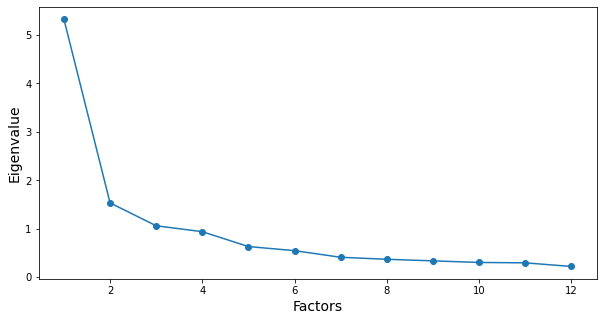

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.scatter(np.arange(original_eigen_values.size) + 1, original_eigen_values)
plt.plot(np.arange(original_eigen_values.size) + 1, original_eigen_values)
plt.xlabel("Factors", size=14)
plt.ylabel("Eigenvalue", size=14)
plt.show()

En nuestro caso, el codo estaría en el factor 5, de modo que optaríamos por tener solo 4 factores. Nota que con este criterio incluimos un factor más que con el criterio de Kaiser. 

Identificar el codo es muchas veces difícil y, por lo tanto, este método se considera más subjetivo que los demás.

#### Análisis paralelo de Horn

Este procedimiento **genera un gran número (por ejemplo, 500 o 1000) de conjuntos de datos simulados con valores aleatorios** para el mismo número de variables y tamaño de muestra que nuestros datos. 

Luego, cada uno de estos conjuntos de datos simulados se analiza factorialmente, ya sea con componentes principales o métodos de factor común, y **los autovalores se promedian para cada factor en todos los conjuntos de datos**. 

A continuación, estos valores se comparan con los autovalores extraídos de los datos originales y **se conservan todos los factores con autovalores superiores a los de los conjuntos de datos simulados**.

Apliquemos este método a nuestro ejemplo:

In [14]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [1]:
%%R
## Instalación completa. Tarda algunos minutos, pero vale la pena.
install.packages(c("psych","GPArotation"), dependencies=TRUE)

## Instalación rápida, sin incluir rotación oblimin
#install.packages("psych")

UsageError: Cell magic `%%R` not found.


Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


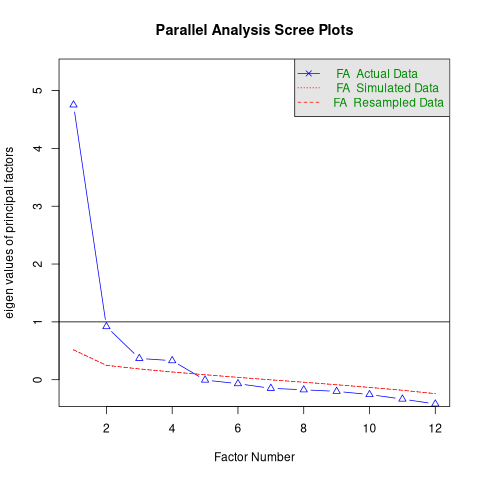

In [15]:
%%R -i scaled_df
library(foreign)
library(psych)

# Parallel Analysis with Psych package
parallel <- fa.parallel(scaled_df, n.iter=1000, fa="fa")

El método de análisis paralelo sugiere retener 4 factores. 

### Extracción de factores

Veamos ahora el resultado de extraer 4 factores:

In [9]:
fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
e1,0.746731,-0.259467,-0.016012,-0.302649
e2,0.769004,-0.364312,-0.000957,0.281676
e3,0.582640,0.402019,0.476606,-0.135526
e4,0.563172,0.291738,-0.274500,0.200396
e5,0.695196,-0.335919,0.061153,-0.179471
e6,0.722729,-0.310767,-0.009162,0.167908
e7,0.675575,0.398699,-0.465296,-0.188224
e8,0.577266,0.249788,-0.073649,0.274039
e9,0.717223,-0.183525,0.067337,-0.242321
e10,0.519157,-0.191664,0.062131,0.233505


Podemos apreciar que **los factores se extraen en el orden de su varianza extraída**. El primer factor tiende a ser un factor general con casi todas las variables cargadas de manera significativa, y representa la mayor cantidad de varianza. El segundo factor y los siguientes se basan entonces en la cantidad residual de varianza. 

Cada uno explica porciones de variación sucesivamente más pequeñas. Debemos tener en cuenta que **el primer factor** no es necesariamente más "importante" que los factores subsiguientes para cualquier otro propósito (por ejemplo, predicción), pero solo que **representa la mayor varianza contabilizada en el conjunto de variables**.

In [10]:
communalities = pd.DataFrame(
    fa.get_communalities(), index=df.columns.values, columns=["Communalities"]
)
communalities

,Communalities
e1,0.716783
e2,0.803432
e3,0.746609
e4,0.517782
e5,0.632088
e6,0.647191
e7,0.867293
e8,0.476151
e9,0.611344
e10,0.364644


## Rotación de factores

El término rotación significa exactamente lo que implica. Específicamente, los ejes de referencia de los factores giran alrededor del origen hasta que se alcanza alguna otra posición.

El efecto final de rotar la matriz de factores es **redistribuir la varianza de los primeros factores a los últimos para lograr un patrón de factores más simple y teóricamente más significativo**.

Apliquemos la rotación ortogonal a nuestro ejemplo:

In [11]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
e1,0.759255,0.234900,0.268340,0.114587
e2,0.428575,0.188419,0.759220,0.088539
e3,0.278379,0.216322,0.043672,0.787662
e4,0.055105,0.633675,0.298707,0.154838
e5,0.684145,0.117821,0.369717,0.116022
e6,0.453114,0.198522,0.627683,0.092095
e7,0.324917,0.866867,0.013462,0.100408
e8,0.042483,0.489038,0.387208,0.291991
e9,0.671468,0.210938,0.268763,0.209157
e10,0.239053,0.118731,0.523929,0.137473


Podemos apreciar cómo la rotación forzó las cargas factoriales a valores cercanos a cero para las variables no relacionadas a cada factor. 

Ahora veamos la estructura factorial gráficamente:

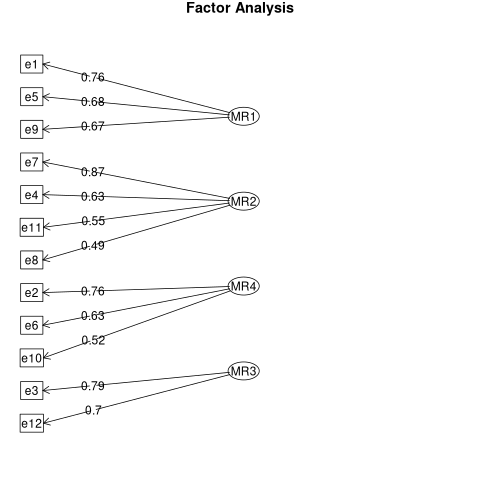

In [19]:
%%R -i scaled_df
# Extrae los factores
fit <- fa(scaled_df, nfactors=4,rotate="varimax")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.3)

#### Métodos de extracción oblicua

Las rotaciones oblicuas son similares a las rotaciones ortogonales, excepto que las rotaciones oblicuas **permiten factores correlacionados en lugar de mantener la independencia entre los factores rotados**.

Con la posibilidad de factores correlacionados, el investigador de factores debe tener un cuidado adicional para validar los factores rotados oblicuamente, porque **tienen una forma adicional (no ortogonalidad) de volverse específicos de la muestra y no generalizables, particularmente con muestras pequeñas**.

Se cuentan con algunas alternativas:

- Oblimin: Es la más común. 
- Promax: Se puede calcular más rápidamente que una rotación oblimin directa, por lo que es útil para grandes conjuntos de datos. 

Apliquemos la rotación oblicua a nuestro ejemplo:

In [12]:
fa = FactorAnalyzer(n_factors=4, rotation="oblimin")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
e1,0.397107,0.201834,0.069122,0.492619
e2,0.918961,-0.017542,-0.022722,-0.019491
e3,-0.076456,0.028047,0.862679,0.101513
e4,0.232403,0.578918,0.034724,-0.260607
e5,0.518799,0.033631,0.075419,0.406685
e6,0.768151,0.035069,-0.002647,0.060743
e7,-0.074991,0.962508,-0.023864,0.062771
e8,0.329802,0.350162,0.203184,-0.290404
e9,0.367315,0.142194,0.179593,0.409873
e10,0.611126,-0.050136,0.072485,-0.069287


Dado que los factores no son necesariamente ortogonales, podemos explorar la correlación entre estos:

In [13]:
factor_corr = pd.DataFrame(fa.phi_)
print("Correalación entre factores:")
factor_corr.columns += 1
factor_corr.index += 1
factor_corr.set_index("F" + factor_corr.index.astype(str), inplace=True)
factor_corr = factor_corr.add_prefix("F")
factor_corr

Correalación entre factores:


,F1,F2,F3,F4
F1,1.000000,0.464985,0.407983,0.302323
F2,0.464985,1.000000,0.457979,0.171127
F3,0.407983,0.457979,1.000000,0.130324
F4,0.302323,0.171127,0.130324,1.000000


Además, podemos examinar la matriz de estructura, la cual muestra las correlaciones entre las variables observadas y los factores. 

> Nota: La matriz de estructura se puede obtener multiplicando la matriz de cargas factoriales por la matriz de correlación entre factores.

In [14]:
structure = pd.DataFrame(fa.structure_, index=scaled_df.columns)
print("Matriz de estructura:")
structure.columns += 1
structure = structure.add_prefix("F")
structure

Matriz de estructura:


,F1,F2,F3,F4
e1,0.668088,0.502440,0.387771,0.656221
e2,0.895642,0.396020,0.341624,0.252369
e3,0.319233,0.404956,0.857561,0.195626
e4,0.436971,0.658288,0.360709,-0.086752
e5,0.688157,0.379000,0.355483,0.579114
e6,0.801742,0.401431,0.334723,0.298629
e7,0.381802,0.927451,0.394529,0.201700
e8,0.487722,0.546874,0.460258,-0.104296
e9,0.630618,0.465381,0.447990,0.568659
e10,0.596440,0.255369,0.289823,0.116338


Podemos sintetizar esta información gráficamente: 

R[write to console]: Loading required namespace: GPArotation



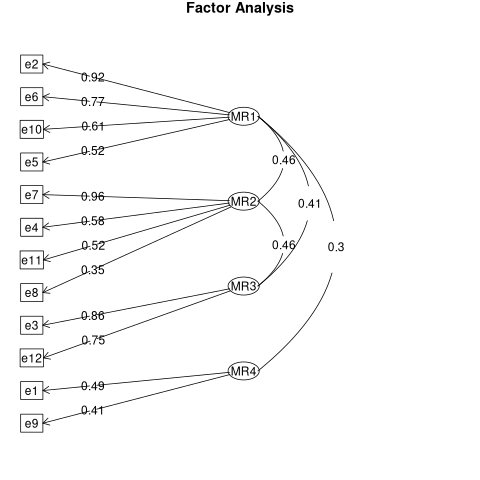

In [23]:
%%R -i scaled_df
# Extrae los factores
fit <- fa(scaled_df, nfactors=4,rotate="oblimin")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.3)

## Interpretación de Factores



### Examinar las Cargas Factoriales

#### Signifcancia práctica

Utilizando la importancia práctica como criterio, podemos evaluar las cargas de la siguiente manera:
- Las cargas factoriales inferiores a .10 pueden considerarse equivalentes a cero con el fin de evaluar la estructura simple.
- Se considera que las cargas factoriales en el rango de .30 a .40 cumplen con el nivel mínimo para la interpretación de la estructura.
- Las cargas de .50 o más se consideran significativas practicamente.
- Las cargas superiores a .70 se consideran indicativas de una estructura bien definida y son el objetivo de cualquier análisis factorial.

En nuestro ejemplo de modelo simple de 4 factores extraidos rotados ortogonalmente, consideremos un punto de corte de .5 para evaluar la significancia práctica de las cargas factoriales:

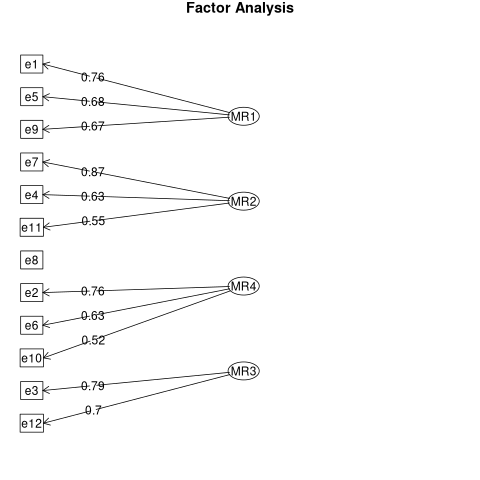

In [24]:
%%R
# Extrae los factores
fit <- fa(scaled_df, nfactors=4,rotate="varimax")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.5)

Podemos observar que la variable `e8` no alcanza el mínimo para ser asociado a uno de los factores latentes. 

#### Cargas cruzadas

Una **estructura de factores óptima**, denominada estructura simple, **existe cuando todas las variables tienen cargas altas solo en un factor y cargas muy bajas en todos los demás factores**.

Las cargas cruzadas de una variable (cargas en dos factores) pueden evaluarse por la **razón de sus cargas al cuadrado** y clasificarse como problemáticas (razón entre 1.0 y 1.5), potenciales (razón entre 1.5 y 2.0) o ignorables (razón mayor que 2.0). 

Las cargas cruzadas problemáticas, y quizás incluso las potenciales, se eliminan a menos que estén justificadas teóricamente o el objetivo sea estrictamente la reducción de datos.

Evaluemos las cargas cruzadas en nuestro ejemplo:

In [26]:
fa_int = FactorAnalyzer(n_factors=4, rotation="varimax")
fa_int.fit(scaled_df)

sig_loadings = pd.DataFrame(fa_int.loadings_, index=scaled_df.columns)
sig_loadings[sig_loadings < 0.3] = None
sig_loadings.columns += 1
sig_loadings = sig_loadings.add_prefix("F")
sig_loadings

,F1,F2,F3,F4
e1,0.759255,NaN,NaN,NaN
e2,0.428575,NaN,0.759220,NaN
e3,NaN,NaN,NaN,0.787662
e4,NaN,0.633675,NaN,NaN
e5,0.684145,NaN,0.369717,NaN
e6,0.453114,NaN,0.627683,NaN
e7,0.324917,0.866867,NaN,NaN
e8,NaN,0.489038,0.387208,NaN
e9,0.671468,NaN,NaN,NaN
e10,NaN,NaN,0.523929,NaN


Aquí se muestran las cargas factoriales con significancia estadística. Podemos observar más de una variable con cargas cruzadas. 

Ahora examinemos la razón de sus cargas al cuadrado:

In [15]:
fa_int = FactorAnalyzer(n_factors=4, rotation="varimax")
fa_int.fit(scaled_df)


def cross_loading_eval(ratio):
    if ratio < 1.5:
        return "Problematic"
    elif ratio < 2:
        return "Potential"
    else:
        return "Ignorable"


squared_loadings = pd.DataFrame(fa_int.loadings_**2, index=scaled_df.columns)
squared_loadings.columns += 1
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings["Ratio"] = squared_loadings.apply(
    lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1
)
squared_loadings["Classification"] = squared_loadings["Ratio"].apply(
    cross_loading_eval
)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,F3,F4,Ratio,Classification
e1,0.576468,0.055178,0.072006,0.013130,8.005786,Ignorable
e2,0.183677,0.035502,0.576415,0.007839,3.138204,Ignorable
e3,0.077495,0.046795,0.001907,0.620411,8.005811,Ignorable
e4,0.003037,0.401544,0.089226,0.023975,4.500301,Ignorable
e5,0.468054,0.013882,0.136691,0.013461,3.424181,Ignorable
e6,0.205312,0.039411,0.393986,0.008481,1.918960,Potential
e7,0.105571,0.751458,0.000181,0.010082,7.118011,Ignorable
e8,0.001805,0.239158,0.149930,0.085259,1.595129,Potential
e9,0.450869,0.044495,0.072233,0.043747,6.241851,Ignorable
e10,0.057146,0.014097,0.274502,0.018899,4.803476,Ignorable


Las variables `e6` y `e8` presentan cargas cruzadas que pueden ser clasificadas como potencialmente problemáticas.  

### Evaluar las comunalidades

El investigador debe buscar cualquier variable que no esté adecuadamente considerada por la solución factorial. El investigador debe ver las comunalidades para evaluar si las variables cumplen con niveles aceptables de explicación. 

Por lo general, **las variables deben tener comunalidades superiores a .50 para ser retenidas en el análisis**.

Evaluemos las comunalidades en nuestro ejemplo.  

In [16]:
communalities = pd.DataFrame(
    fa_int.get_communalities(),
    index=df.columns.values,
    columns=["Communalities"],
)
communalities

,Communalities
e1,0.716783
e2,0.803432
e3,0.746609
e4,0.517782
e5,0.632088
e6,0.647191
e7,0.867293
e8,0.476151
e9,0.611344
e10,0.364644


Las comunalidades sugieren que la variables `e8`, `e10` y `e11` no se explican adecuadamente por nuestra solución factorial.

## Uso de resultados del AF en análisis subsecuentes

### Escalas sumadas

En términos simples, **todas las variables que cargan mucho en un factor se combinan** y el total, o más comúnmente el puntaje promedio de las variables, **se usa como una variable de reemplazo**.

El cálculo de una escala sumada es un proceso sencillo mediante el cual los elementos que componen la escala sumada (es decir, los elementos con cargas altas del análisis factorial) se suman o promedian. **El enfoque más común es tomar el promedio de los ítems de la escala**, lo que proporciona al investigador un control completo sobre el cálculo y facilita su uso en análisis posteriores.

Calculemos una escala sumada a partir de nuestro ejemplo:

In [18]:
# Creamos una variable que mapee cada factor a las variables con las que presenta una mayor carga.
factor_index = {
    "F1": ["e1", "e2", "e5", "e6", "e9", "e10"],
    "F2": ["e4", "e7", "e11"],
    "F3": ["e12", "e3"],
}

print("Escala sumada:")
summated_scale = pd.DataFrame()
for i in factor_index:
    summated_scale[i] = df[factor_index[i]].mean(axis=1)
summated_scale

Escala sumada:


,F1,F2,F3
0,5.000000,3.666667,3.0
1,3.500000,2.666667,2.5
2,5.000000,4.333333,2.5
3,4.500000,4.000000,2.0
4,3.500000,3.333333,4.0
...,...,...,...
352,4.500000,3.333333,2.0
353,5.000000,2.666667,2.0
354,5.000000,5.000000,3.0
355,4.166667,4.000000,2.5


Este es el **procedimiento comunmente utilizado en el desarrollo de escalas psicométricas**. Recuerda que deben tomarse en cuenta cuatro aspectos básicos para la construcción de cualquier escala sumada: definición conceptual, dimensionalidad, confiabilidad y validez de constructo.

Calculemos la medida de confiabilidad Alfa de Cronbach en nuestro ejemplo:

In [19]:
cronbach = pd.DataFrame()
for i in factor_index:
    cronbach[i] = pg.cronbach_alpha(data=df[factor_index[i]])
cronbach.index = ["Cronbach’s α", "C.I. - 95%"]
cronbach

,F1,F2,F3
Cronbach’s α,0.868176,0.781722,0.75553
C.I. - 95%,"[0.846, 0.888]","[0.739, 0.818]","[0.699, 0.801]"


# Introducción a los modelos de ecuaciones estructurales

Partamos de un ejemplo:

In [ ]:
#!pip install semopy

In [1]:
import pandas as pd
from semopy.examples import political_democracy

df = political_democracy.get_data()
df

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679
...,...,...,...,...,...,...,...,...,...,...,...
71,5.40,9.999998,6.666666,3.333333,3.750000,6.666666,6.666666,1.485166,4.477337,3.091042,1.987909
72,7.50,8.800000,9.999998,6.066666,7.500000,6.666666,9.999998,6.666666,5.337538,5.631212,3.491004
73,7.50,7.000000,9.999998,6.852998,7.500000,6.348340,6.666666,7.508044,6.129050,6.403574,5.001796
74,10.00,6.666666,9.999998,10.000000,10.000000,6.666666,9.999998,10.000000,5.003946,4.962845,3.976994


In [ ]:
import semopy

measure_desc = """
# Measurement
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
"""

g = semopy.semplot(measure_desc, "out.png")
g

### Reporte

Se deben usar índices de ajuste múltiples para evaluar la bondad de ajuste de un modelo y deben incluir:
- El valor $X^{2}$ y el gl asociado.
- Un índice de ajuste absoluto (GFI, RMSEA o SRMR).
- Un índice de ajuste incremental (CFI o TLI).
- Un índice de bondad de ajuste (GFI, CFI, TLI, etc.).
- Un índice de mal ajuste (RMSEA, SRMR, etc.).

En general, reportar $X^{2}$, CFI y RMSEA puede ser suficiente para evaluar un modelo SEM.

Revisemos estos índices en nuestro ejemplo:

In [6]:
measure_model = semopy.Model(measure_desc)
res = measure_model.fit(df)

In [7]:
stats = semopy.calc_stats(measure_model)
print(stats.T)

                    Value
DoF             41.000000
DoF Baseline    55.000000
chi2            72.461632
chi2 p-value     0.001761
chi2 Baseline  730.654577
CFI              0.953435
GFI              0.900826
AGFI             0.866962
NFI              0.900826
TLI              0.937535
RMSEA            0.101832
AIC             48.067690
BIC            106.004893
LogLik           0.966155


## Especificación el modelo estructural

Consiste en **especificar el modelo estructural asignando relaciones de un constructo a otro con base en el modelo teórico propuesto**.

En otras palabras, el **investigador identifica las relaciones de dependencia que se supone que existen entre los constructos, y cada hipótesis representa una relación específica que debe especificarse**. Las relaciones muestran cómo un constructo influye en otro y puede ser directo o indirecto. Por tanto, el modelo muestra todas las relaciones de dependencia que existen entre los constructos.

Veamos como esto aplica a nuestro ejemplo:


In [8]:
struct_desc = """
# Measurement
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8

# Structure
dem60 ~ ind60
dem65 ~ ind60 + dem60

# Covariances
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8

"""

g = semopy.semplot(struct_desc, "out.png", plot_covs=True)
g

Validemos el modelo estructural de nuestro ejemplo:

In [9]:
struct_model = semopy.Model(struct_desc)
res = struct_model.fit(df)

In [10]:
stats = semopy.calc_stats(struct_model)
print(stats.T)

                    Value
DoF             35.000000
DoF Baseline    55.000000
chi2            38.125446
chi2 p-value     0.329171
chi2 Baseline  730.654577
CFI              0.995374
GFI              0.947820
AGFI             0.918003
NFI              0.947820
TLI              0.992731
RMSEA            0.034738
AIC             60.983321
BIC            132.825453
LogLik           0.508339


Procedamos ahora a examinar las estimaciones de los parámetros:

In [ ]:
g = semopy.semplot(struct_model, "out.png", std_ests=True, plot_covs=True)
g

In [11]:
estimates = struct_model.inspect(std_est=True)
estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,dem60,~,ind60,1.482379,0.446751,0.399024,3.715017,0.000203
1,dem65,~,ind60,0.571912,0.182178,0.221383,2.583364,0.009784
2,dem65,~,dem60,0.837574,0.885286,0.098446,8.507992,0.0
3,x1,~,ind60,1.000000,0.919814,-,-,-
4,x2,~,ind60,2.180494,0.973010,0.138565,15.736254,0.0
5,x3,~,ind60,1.818546,0.872109,0.151993,11.96465,0.0
6,y1,~,dem60,1.000000,0.850193,-,-,-
7,y2,~,dem60,1.256819,0.716628,0.182687,6.879647,0.0
8,y3,~,dem60,1.058174,0.722308,0.151521,6.983699,0.0
9,y4,~,dem60,1.265186,0.845633,0.145151,8.716344,0.0


Para contar con un reporte más detallado de nuestro modelo estructural podemos examinar el reporte generado por el paquete `semopy`:

In [ ]:
semopy.report(struct_model, "Job")

# Análisis Factorial Confirmatorio


## ¿Qué es el Análisis Factorial Confirmatorio (AFC)?

AFC es **una forma de probar qué tan bien una teoría de medición preespecificada compuesta de variables y factores medidos se ajusta a la realidad** capturada por los datos.

>Una teoría de medición especifica con precisión cómo las variables medidas representan lógica y sistemáticamente los constructos involucrados en un modelo teórico. En otras palabras, la teoría de la medición especifica una serie de **relaciones y restricciones** que sugieren cómo las variables medidas representan un factor latente.

Veamos un ejemplo:

In [12]:
import pandas as pd
from semopy.examples import holzinger39

df = holzinger39.get_data()
df

,id,sex,ageyr,agemo,school,grade,x1,x2,x3,x4,x5,x6,x7,x8,x9
1,1,1,13,1,Pasteur,7.0,3.333333,7.75,0.375,2.333333,5.75,1.285714,3.391304,5.75,6.361111
2,2,2,13,7,Pasteur,7.0,5.333333,5.25,2.125,1.666667,3.00,1.285714,3.782609,6.25,7.916667
3,3,2,13,1,Pasteur,7.0,4.500000,5.25,1.875,1.000000,1.75,0.428571,3.260870,3.90,4.416667
4,4,1,13,2,Pasteur,7.0,5.333333,7.75,3.000,2.666667,4.50,2.428571,3.000000,5.30,4.861111
5,5,2,12,2,Pasteur,7.0,4.833333,4.75,0.875,2.666667,4.00,2.571429,3.695652,6.30,5.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,346,1,13,5,Grant-White,8.0,4.000000,7.00,1.375,2.666667,4.25,1.000000,5.086957,5.60,5.250000
298,347,2,14,10,Grant-White,8.0,3.000000,6.00,1.625,2.333333,4.00,1.000000,4.608696,6.05,6.083333
299,348,2,14,3,Grant-White,8.0,4.666667,5.50,1.875,3.666667,5.75,4.285714,4.000000,6.00,7.611111
300,349,1,14,2,Grant-White,8.0,4.333333,6.75,0.500,3.666667,4.50,2.000000,5.086957,6.20,4.388889


In [13]:
import semopy

measure_desc = """
# Measurement
visual =~ x1 + x2 + x3
textual =~ x4 + x5 + x6
speed =~ x7 + x8 + x9
"""

measure_model = semopy.Model(measure_desc)
res = measure_model.fit(df)
g = semopy.semplot(measure_model, "out.png", std_ests=True)
g

In [14]:
estimates = measure_model.inspect(std_est=True)
estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,x1,~,visual,1.000000,0.771372,-,-,-
1,x2,~,visual,0.554421,0.424031,0.099727,5.559413,0.0
2,x3,~,visual,0.730526,0.581638,0.10918,6.691009,0.0
3,x4,~,textual,1.000000,0.851665,-,-,-
4,x5,~,textual,1.113076,0.855141,0.065392,17.021522,0.0
5,x6,~,textual,0.926120,0.838083,0.055425,16.709493,0.0
6,x7,~,speed,1.000000,0.569252,-,-,-
7,x8,~,speed,1.179980,0.722802,0.165045,7.149459,0.0
8,x9,~,speed,1.082517,0.665275,0.151354,7.152197,0.0
9,speed,~~,speed,0.383377,1.000000,0.086171,4.449045,0.000009


In [15]:
stats = semopy.calc_stats(measure_model).round(3)
print(stats.T)

                 Value
DoF             24.000
DoF Baseline    36.000
chi2            85.306
chi2 p-value     0.000
chi2 Baseline  918.852
CFI              0.931
GFI              0.907
AGFI             0.861
NFI              0.907
TLI              0.896
RMSEA            0.092
AIC             41.433
BIC            119.283
LogLik           0.283


## Evaluación de la validez del modelo de medición

Una vez que el modelo de medición se especifica correctamente, se estima un modelo SEM correspondiente para proporcionar una evaluación empírica de la precisión de la teoría de medición. 

Los resultados nos permiten comparar la teoría con la realidad representada por los datos de la muestra.

Las estimaciones de carga pueden ser estadísticamente significativas pero aún ser demasiado bajas para calificar como un buen elemento.

- En AFC, **los elementos con cargas bajas (por debajo de 0.5) se convierten en candidatos para eliminación**.
- Las cargas estandarizadas por encima de 1 o por debajo de - 1 están fuera del rango posible y pueden ser un indicador importante de algún problema con los datos.

Los patrones de residuos relativamente altos sugieren que falta algo en el modelo, como otro factor.

- Normalmente, los **residuos estandarizados inferiores a |2.5| no sugieren un problema**.
- Los residuos estandarizados superiores a |4| indican un grado de error potencialmente inaceptable que puede requerir la eliminación de un elemento infractor.
- Los residuos estandarizados entre |2.5| y |4| merecen cierta atención, pero es posible que no sugieran ningún cambio en el modelo si no hay otros problemas asociados con esos dos elementos.

Evaluemos estos criterios en nuestro ejemplo:

In [ ]:
g = semopy.semplot(measure_model, "out.png", std_ests=True)
g

Podemos apreciar que la variable `x2` es candidata a ser eliminada por presentar una carga factorial menor a 0.5. 

In [16]:
import numpy as np

cov_estimate, _ = measure_model.calc_sigma()
cov = measure_model.mx_cov
residual = cov - cov_estimate
std_residual = residual / np.std(residual)

std_res = pd.DataFrame(
    std_residual,
    columns=measure_model.names_lambda[0],
    index=measure_model.names_lambda[0],
)
std_res

,x1,x2,x3,x4,x5,x6,x7,x8,x9
x1,-0.001162,-0.472395,-0.122718,1.118730,-0.160213,0.888591,-2.055027,-0.526897,2.022619
x2,-0.472395,-0.000782,1.433007,-0.201994,-0.473432,0.439234,-2.804817,-0.716381,1.004327
x3,-0.122718,1.433007,-0.002723,-1.043764,-2.545314,-0.372063,-1.195163,-0.158029,1.929717
x4,1.118730,-0.201994,-1.043764,-0.005639,0.079946,-0.140347,0.534581,-0.918251,0.642273
x5,-0.160213,-0.473432,-2.545314,0.079946,-0.007229,0.049400,-0.582012,-0.549251,0.997138
x6,0.888591,0.439234,-0.372063,-0.140347,0.049400,-0.004471,-0.193472,-0.281341,0.717796
x7,-2.055027,-2.804817,-1.195163,0.534581,-0.582012,-0.193472,0.000641,0.960126,-0.483307
x8,-0.526897,-0.716381,-0.158029,-0.918251,-0.549251,-0.281341,0.960126,0.002934,-0.375258
x9,2.022619,1.004327,1.929717,0.642273,0.997138,0.717796,-0.483307,-0.375258,-0.000666


Podemos apreciar que los residuos estandarizados se mantienen dentro de rangos aceptables (< 2.5), a excepción de las covaraciones `x2-x7` y `x5-x3`.

### Validez de constructo

La validez de constructo es **la medida en que un conjunto de elementos medidos reflejan con precisión los constructos latentes teóricos que están diseñados para medir**. Por tanto, la validez de constructo se ocupa de la precisión de la medición.

En general, **las estimaciones de carga estandarizadas deben ser .5 o más, e idealmente, .7 o más, para indicar validez convergente**. 

>Validez convergente: Mide el grado en el que los ítems que son indicadores de un constructo específico comparten una alta proporción de varianza en común.

Ahora procederemos a revisar sus índices más importantes:

#### Varianza extraida promedio (AVE)

La varianza media extraída (AVE) se calcula como la varianza media extraída para los elementos que se cargan en un constructo y es un indicador resumido de convergencia:

$$ AVE = \frac{\sum_{i=1}^{n} L^{2}_{i}}{n}   $$

$L_{i}$ representa la carga factorial completamente estandarizada para la i-ésima variable medida y $n$ es el número de indicadores de ítem para un constructo.

Se debe calcular una medida **AVE para cada constructo latente en un modelo de medición**.

Un AVE de .5 o más sugiere una validez convergente adecuada. Un AVE de menos de .5 indica que, en promedio, permanece más error en los ítems que la varianza que se tiene en común con el factor latente sobre el que se cargan. 

Examinemos la AVE en nuestro ejemplo:

In [17]:
# Get loadings and constructs
estimates = measure_model.inspect(std_est=True)
loadings = estimates[estimates["op"] == "~"]
constructs = loadings["rval"].unique().tolist()

# AVE computation
print("AVE")
for cons in constructs:
    squared_loadings = loadings[loadings["rval"] == cons]["Est. Std"] ** 2
    ave = squared_loadings.sum() / squared_loadings.size
    print(cons, ":", ave)

AVE
visual : 0.3710397858553595
textual : 0.7196608737682286
speed : 0.42969400059140545


Podemos apreciar que solo el factor `textual` tiene una validez convergente adecuada.

Para evaluar la validez discriminante, **las estimaciones de AVE para cada factor deben ser mayores que el cuadrado de las correlaciones asociadas a dicho factor**. Esto debido a que un constructo latente debería explicar más la varianza en sus medidas de ítem que lo que comparte con otro constructo.

>Validez discriminante: Mide **el grado en que un constructo o variable es realmente distinto de otros constructos o variables**. Por lo tanto, una alta validez discriminante proporciona evidencia de que un constructo es único y captura algunos fenómenos que otras medidas no captan.

Evaluemos este criterio en nuestro ejemplo:

In [18]:
cors = estimates.query(f'op == "~~" & rval == {constructs} & rval != lval')
cors.insert(5, "r^2", cors["Est. Std"] ** 2)
cors

,lval,op,rval,Estimate,Est. Std,r^2,Std. Err,z-value,p-value
11,textual,~~,speed,0.173603,0.283220,0.080213,0.049316,3.520223,0.000431
12,textual,~~,visual,0.408277,0.458718,0.210422,0.073527,5.55273,0.0
14,visual,~~,speed,0.262135,0.470895,0.221742,0.056252,4.659977,0.000003


Podemos apreciar que para cada constructo, los valores AVE son mayores al cuadrado de las correlaciones asociadas a dicho constructo. Esto da cuenta de una buena validez discriminante.

#### Confiabilidad de constructo (CR)

La confiabilidad es también un indicador de validez convergente. La confiabilidad de constructo se calcula a partir de la suma al cuadrado de las cargas factoriales $L_{i}$ y la suma de los términos de varianza del error $e_{i}$, para cada constructo:

$$ CR = \frac{ (\sum_{i=1}^{n} L_{i})^{2} } { (\sum_{i=1}^{n} L_{i})^{2} + (\sum_{i=1}^{n} e_{i})^{2}   } $$


Una alta confiabilidad de constructo (> |.7|) indica que existe consistencia interna, lo que significa que todas las medidas representan consistentemente el mismo constructo latente.

Evaluemos este criterio en nuestro ejemplo:

In [19]:
# Get loadings and constructs
estimates = measure_model.inspect(std_est=True)
loadings = estimates[estimates["op"] == "~"]
lambdas = pd.DataFrame(
    measure_model.mx_lambda,
    columns=measure_model.names_lambda[1],
    index=measure_model.names_lambda[0],
)
constructs = loadings["rval"].unique().tolist()

# CR computation
print("CR")
for cons in constructs:
    loads = loadings[loadings["rval"] == cons]["Est. Std"]
    idx = np.array(lambdas[cons].to_numpy().nonzero()[0])
    vars = np.array(measure_model.names_lambda[0])[idx].tolist()
    errors = estimates.query(f' op == "~~" & lval == rval & rval == {vars} ')[
        "Est. Std"
    ]
    cr = loads.sum() ** 2 / (loads.sum() ** 2 + errors.sum() ** 2)
    print(cons, ":", cr)

CR
visual : 0.4700481355960279
textual : 0.901540531736004
speed : 0.5668724304728705


Podemos apreciar que solo `textual` presenta niveles adecuados de confiabilidad de constructo, lo cual sugiere que `visual` y `speed` no cuentan con evidencia de validez convergente.

En general, **el AFC no es una herramienta exploratoria**. Se trata de una técnica que permite confirmar teorías de medición a partir de una muestra.

Los **resultados de AFC que sugieren más que una modificación menor deben reevaluarse con un nuevo conjunto de datos**. Por ejemplo, si se eliminan más del 20% por ciento de las variables medidas, las modificaciones no pueden considerarse menores.